# loading Data

In [1]:
import pandas as pd

# Load the dataset
churn_data = pd.read_csv('churn_clean.csv')

# Display the first few rows of the dataset
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


# Null Value Analysis

In [2]:
# Check for missing values in the dataset
missing_values = churn_data.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]

Series([], dtype: int64)

# Data Type Analysis

In [3]:
# Check the data types of each column
data_types = churn_data.dtypes

# Check the distribution of key variables (Churn, MonthlyCharge, Bandwidth_GB_Year, Tenure)
key_variable_distribution = churn_data[['Churn', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']].describe()

data_types, key_variable_distribution

(CaseOrder                 int64
 Customer_id              object
 Interaction              object
 UID                      object
 City                     object
 State                    object
 County                   object
 Zip                       int64
 Lat                     float64
 Lng                     float64
 Population                int64
 Area                     object
 TimeZone                 object
 Job                      object
 Children                  int64
 Age                       int64
 Income                  float64
 Marital                  object
 Gender                   object
 Churn                    object
 Outage_sec_perweek      float64
 Email                     int64
 Contacts                  int64
 Yearly_equip_failure      int64
 Techie                   object
 Contract                 object
 Port_modem               object
 Tablet                   object
 InternetService          object
 Phone                    object
 Multiple 

# Statistical Summary

In [4]:
# Get summary statistics for the dependent and independent variables
variable_summary = churn_data[['Churn', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']].describe(include='all')

variable_summary

,Churn,MonthlyCharge,Bandwidth_GB_Year,Tenure
count,10000,10000.000000,10000.000000,10000.000000
unique,2,NaN,NaN,NaN
top,No,NaN,NaN,NaN
freq,7350,NaN,NaN,NaN
mean,NaN,172.624816,3392.341550,34.526188
std,NaN,42.943094,2185.294852,26.443063
min,NaN,79.978860,155.506715,1.000259
25%,NaN,139.979239,1236.470827,7.917694
50%,NaN,167.484700,3279.536903,35.430507
75%,NaN,200.734725,5586.141370,61.479795


# Exloratory Data Analysis

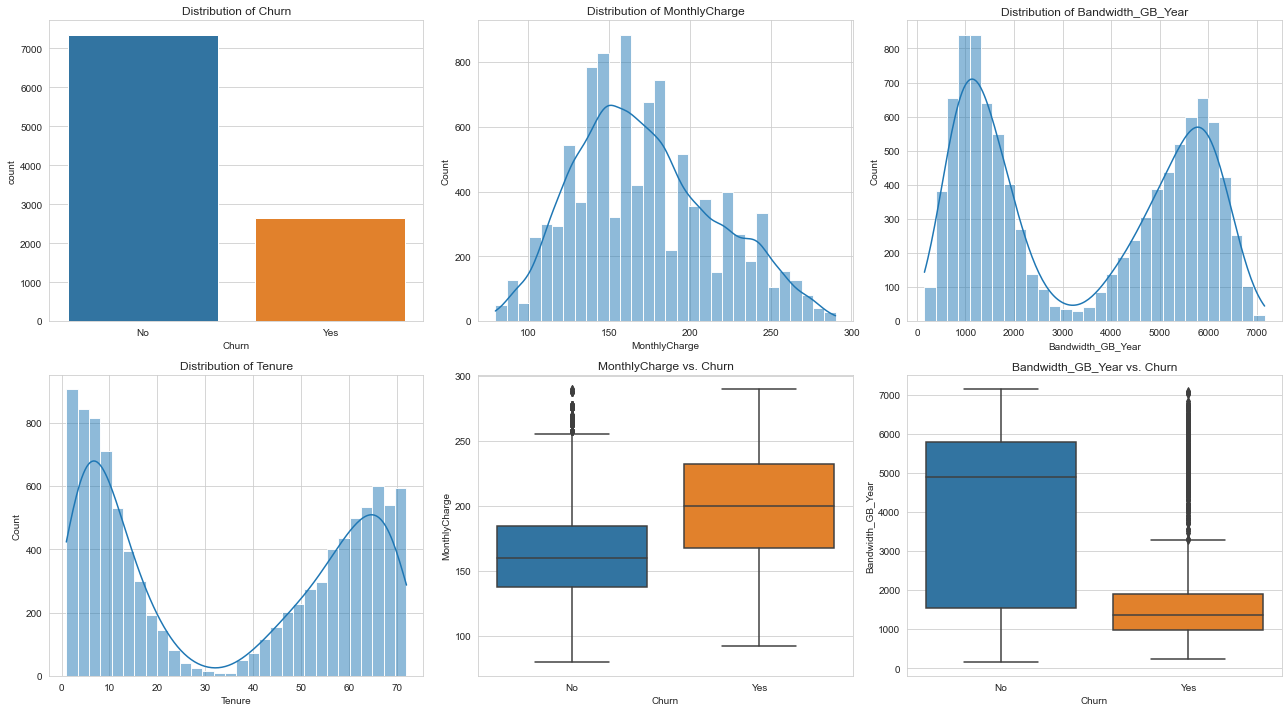

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetic style for the plots
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Univariate distributions
sns.countplot(data=churn_data, x='Churn', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Churn')
sns.histplot(churn_data['MonthlyCharge'], bins=30, ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of MonthlyCharge')
sns.histplot(churn_data['Bandwidth_GB_Year'], bins=30, ax=ax[0, 2], kde=True)
ax[0, 2].set_title('Distribution of Bandwidth_GB_Year')
sns.histplot(churn_data['Tenure'], bins=30, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Tenure')

# Bivariate distributions
sns.boxplot(data=churn_data, x='Churn', y='MonthlyCharge', ax=ax[1, 1])
ax[1, 1].set_title('MonthlyCharge vs. Churn')
sns.boxplot(data=churn_data, x='Churn', y='Bandwidth_GB_Year', ax=ax[1, 2])
ax[1, 2].set_title('Bandwidth_GB_Year vs. Churn')

plt.tight_layout()
plt.show()


# Preprocessing

In [6]:
# Convert 'Churn' column to binary format
churn_data['Churn'] = churn_data['Churn'].map({'No': 0, 'Yes': 1})

# Check skewness of key independent variables
skewness = churn_data[['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']].skew()

# Apply log transformation to variables with high skewness
if skewness['MonthlyCharge'] > 0.5:
    churn_data['MonthlyCharge'] = np.log1p(churn_data['MonthlyCharge'])

if skewness['Bandwidth_GB_Year'] > 0.5:
    churn_data['Bandwidth_GB_Year'] = np.log1p(churn_data['Bandwidth_GB_Year'])

if skewness['Tenure'] > 0.5:
    churn_data['Tenure'] = np.log1p(churn_data['Tenure'])

# Check skewness after transformation
post_skewness = churn_data[['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']].skew()

skewness, post_skewness


(MonthlyCharge        0.387315
 Bandwidth_GB_Year    0.067483
 Tenure               0.068604
 dtype: float64,
 MonthlyCharge        0.387315
 Bandwidth_GB_Year    0.067483
 Tenure               0.068604
 dtype: float64)

In [7]:
# Save the prepared dataset to a CSV file
prepared_data_path = "churn_prepared.csv"
churn_data.to_csv(prepared_data_path, index=False)

prepared_data_path


'churn_prepared.csv'

# Modelling

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extracting independent and dependent variables
X = churn_data[['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']]
y = churn_data['Churn']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Constructing the initial multiple linear regression model
initial_model = LinearRegression()
initial_model.fit(X_train, y_train)

# Coefficients and intercept of the initial model
initial_coefficients = initial_model.coef_
initial_intercept = initial_model.intercept_

initial_coefficients, initial_intercept


(array([ 0.00301996,  0.00024917, -0.02841104]), -0.12148503627999796)

In [9]:
import statsmodels.api as sm

# Adding a constant to the independent variables for the OLS regression model
X_with_const = sm.add_constant(X_train)

# Fitting OLS regression model
model_ols = sm.OLS(y_train, X_with_const).fit()

# Summary of the OLS regression model
model_summary = model_ols.summary()

# Extracting p-values for each predictor
p_values = model_ols.pvalues

model_summary, p_values


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Churn   R-squared:                       0.389
 Model:                            OLS   Adj. R-squared:                  0.389
 Method:                 Least Squares   F-statistic:                     1698.
 Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
 Time:                        08:27:35   Log-Likelihood:                -2819.4
 No. Observations:                8000   AIC:                             5647.
 Df Residuals:                    7996   BIC:                             5675.
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------

In [10]:
# Predictions using the initial (also reduced) model
y_train_pred = initial_model.predict(X_train)
y_test_pred = initial_model.predict(X_test)

# R-squared values for training and testing datasets
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test


(0.3891262537892419, 0.4102220659484629)

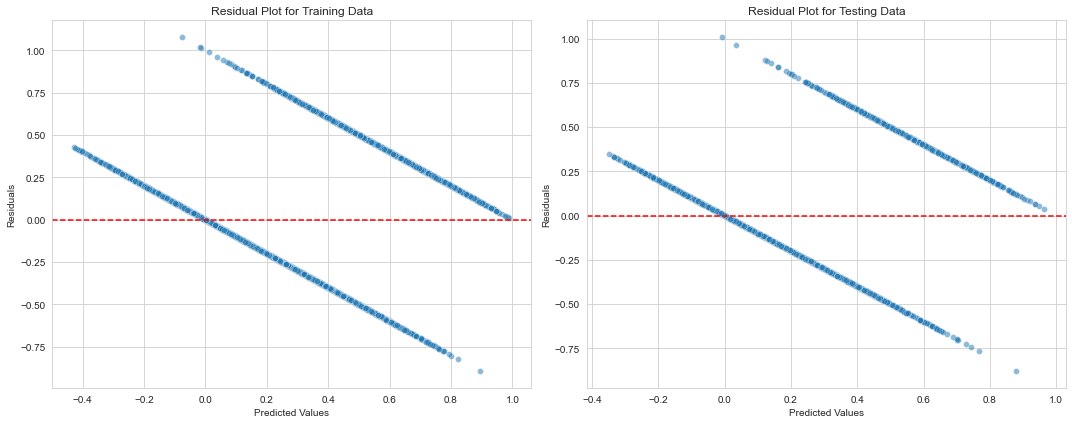

(0.34429331739854696, 0.34208114008514584)

In [11]:
# Calculating residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Residual Standard Error (RSE)
RSE_train = (sum(residuals_train**2) / (len(y_train) - 3 - 1))**0.5
RSE_test = (sum(residuals_test**2) / (len(y_test) - 3 - 1))**0.5

# Plotting the residual plots for training and testing data
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=y_train_pred, y=residuals_train, ax=ax[0], alpha=0.5)
ax[0].set_title('Residual Plot for Training Data')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
ax[0].axhline(y=0, color='r', linestyle='--')

sns.scatterplot(x=y_test_pred, y=residuals_test, ax=ax[1], alpha=0.5)
ax[1].set_title('Residual Plot for Testing Data')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

RSE_train, RSE_test
